# Final Project 3

This data set contains Pet Shelter data by Shelter for the years 2008 - 2014.  The data set is for dogs.

In [31]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pylab as pl
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model
pd.options.display.max_columns = 999
pd.options.display.max_rows = 999

In [32]:
#read in dog data from source 

df_dog = pd.read_csv("dogs_final_csv.csv")

print df_dog.head()
print df_dog.count()

                Shelter_Name    Year Shelter_Type  Community_Name  \
0  A New Leash on Life, Inc.  2008.0           AG  Madison County   
1  A New Leash on Life, Inc.  2009.0           AG  Madison County   
2  A New Leash on Life, Inc.  2010.0           AG  Madison County   
3  A New Leash on Life, Inc.  2011.0           AG  Madison County   
4  A New Leash on Life, Inc.  2012.0           AG  Madison County   

  Community_State Community_Region  Community_Population  \
0              AL            South              319510.0   
1              AL            South              327744.0   
2              AL            South              335988.0   
3              AL            South              340111.0   
4              AL            South              343080.0   

   Community_Median_Income  Beginning_Shelter_Count  \
0                  55096.0                     46.0   
1                  57617.0                     54.0   
2                  53539.0                     55.0   
3   

In [33]:
#taking out where Total Intake is zero

df_dog["Total_Intake"].replace(0,np.nan, inplace = True)

df_dog = df_dog.dropna(subset=["Total_Intake"])

df_dog.count()

Shelter_Name                                                                    1392
Year                                                                            1392
Shelter_Type                                                                    1392
Community_Name                                                                  1392
Community_State                                                                 1392
Community_Region                                                                1392
Community_Population                                                            1392
Community_Median_Income                                                         1392
Beginning_Shelter_Count                                                         1392
Subtotal_Intake_from_Public                                                     1392
Subtotal_from_Incoming_Transfers_from_Organizations_within_Community            1392
Subtotal_Intake_from_Incoming_Transfers_from_Organizations_outsid

In [34]:
#create adoption rate

df_dog["Adoption_Rate"] = df_dog["Total_Adoptions"]/df_dog["Total_Outcomes"]

In [35]:
#create euthanized rate

df_dog["Euth_Rate"] = df_dog["Total_Euth"]/df_dog["Total_Outcomes"]

In [36]:
#create Health Status case mix
#sum all Health Statuses, take out where Total Intake Health is zero, create ratio

df_dog["Total_Health_Intake"] = df_dog["Sum_Intake_Healthy"] + df_dog["Sum_Intake_TR"] + df_dog["Sum_Intake_TM"] + df_dog["Sum_Intake_UU"]

df_dog["Total_Health_Intake"].replace(0,np.nan, inplace = True)

df_dog = df_dog.dropna(subset=["Total_Health_Intake"])

df_dog["Percent_Healthy"] = df_dog["Sum_Intake_Healthy"]/df_dog["Total_Health_Intake"]
df_dog.count()

Shelter_Name                                                                    1350
Year                                                                            1350
Shelter_Type                                                                    1350
Community_Name                                                                  1350
Community_State                                                                 1350
Community_Region                                                                1350
Community_Population                                                            1350
Community_Median_Income                                                         1350
Beginning_Shelter_Count                                                         1350
Subtotal_Intake_from_Public                                                     1350
Subtotal_from_Incoming_Transfers_from_Organizations_within_Community            1350
Subtotal_Intake_from_Incoming_Transfers_from_Organizations_outsid

In [37]:
df_dog.isnull().sum()

Shelter_Name                                                                    0
Year                                                                            0
Shelter_Type                                                                    0
Community_Name                                                                  0
Community_State                                                                 0
Community_Region                                                                0
Community_Population                                                            0
Community_Median_Income                                                         0
Beginning_Shelter_Count                                                         0
Subtotal_Intake_from_Public                                                     0
Subtotal_from_Incoming_Transfers_from_Organizations_within_Community            0
Subtotal_Intake_from_Incoming_Transfers_from_Organizations_outside_Community    0
Subtotal_Intake_

In [38]:
df_dog.describe()

,Year,Community_Population,Community_Median_Income,Beginning_Shelter_Count,Subtotal_Intake_from_Public,Subtotal_from_Incoming_Transfers_from_Organizations_within_Community,Subtotal_Intake_from_Incoming_Transfers_from_Organizations_outside_Community,Subtotal_Intake_from_Owners_Guardians_Requesting_Euthanasia,Total_Intake,Total_Adoptions,TOTAL_OUTGOING_TRANSFERS_to _Organizations_within_Community,TOTAL_OUTGOING_TRANSFERS_to _Organizations_Outside_Community,Other_Return_to_Owner_Habitat_Died_Lost,Total_Euth,Total_Outcomes,Sum_Intake_Healthy,Sum_Intake_TR,Sum_Intake_TM,Sum_Intake_UU,Sum_Outgoing_Healthy,Sum_Outgoing_TR,Sum_Outgoing_TM,Sum_Outgoing_UU,Adoption_Rate,Euth_Rate,Total_Health_Intake,Percent_Healthy
count,1350.000000,1.350000e+03,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000
mean,2010.780741,1.112929e+06,56356.405185,75.902222,1659.424444,151.845926,117.115556,90.808889,2019.227407,774.214815,145.580000,129.200741,333.877037,629.865185,2012.737778,1159.682963,319.787407,165.271111,359.262222,825.591852,283.748889,161.120000,402.057778,0.631982,0.130184,2004.003704,0.647918
std,1.992778,1.207722e+06,14045.482473,154.971829,4283.570543,447.026050,382.595709,364.442443,4522.510388,1488.209138,488.424124,432.561502,938.137914,2017.569828,4506.399721,2454.362261,888.888727,595.786960,1386.118583,1711.399039,738.667386,559.875745,1342.739688,0.341037,0.175796,4522.049795,0.264500
min,2008.000000,2.474100e+04,34119.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,2009.000000,2.897148e+05,45383.000000,10.000000,44.000000,0.000000,0.000000,0.000000,143.250000,84.250000,0.000000,0.000000,1.000000,1.000000,142.250000,72.250000,7.000000,1.000000,0.000000,70.000000,4.000000,0.000000,2.000000,0.290144,0.006102,141.000000,0.483891
50%,2011.000000,8.128260e+05,53539.000000,33.000000,284.000000,11.000000,1.000000,0.000000,439.000000,259.000000,1.000000,2.000000,20.000000,12.000000,440.500000,272.500000,58.000000,11.000000,9.000000,227.000000,41.000000,10.000000,16.000000,0.743328,0.038513,433.500000,0.696277
75%,2012.000000,1.529875e+06,67518.000000,79.000000,1504.000000,102.750000,50.000000,13.750000,2066.500000,759.250000,61.000000,64.500000,300.750000,397.750000,2074.250000,1273.750000,295.000000,92.000000,175.750000,820.500000,238.000000,90.000000,240.000000,0.958727,0.211024,2034.750000,0.859536
max,2014.000000,8.491079e+06,97532.000000,2109.000000,43920.000000,5440.000000,5090.000000,6746.000000,43927.000000,12995.000000,6181.000000,5400.000000,15206.000000,22499.000000,43927.000000,30617.000000,11723.000000,7787.000000,17307.000000,17724.000000,11027.000000,7609.000000,16144.000000,1.000000,0.830189,43927.000000,1.000000


In [39]:
df_dog.mean()

Year                                                                            2.010781e+03
Community_Population                                                            1.112929e+06
Community_Median_Income                                                         5.635641e+04
Beginning_Shelter_Count                                                         7.590222e+01
Subtotal_Intake_from_Public                                                     1.659424e+03
Subtotal_from_Incoming_Transfers_from_Organizations_within_Community            1.518459e+02
Subtotal_Intake_from_Incoming_Transfers_from_Organizations_outside_Community    1.171156e+02
Subtotal_Intake_from_Owners_Guardians_Requesting_Euthanasia                     9.080889e+01
Total_Intake                                                                    2.019227e+03
Total_Adoptions                                                                 7.742148e+02
TOTAL_OUTGOING_TRANSFERS_to _Organizations_within_Community           

In [40]:
df_dog.std()

Year                                                                            1.992778e+00
Community_Population                                                            1.207722e+06
Community_Median_Income                                                         1.404548e+04
Beginning_Shelter_Count                                                         1.549718e+02
Subtotal_Intake_from_Public                                                     4.283571e+03
Subtotal_from_Incoming_Transfers_from_Organizations_within_Community            4.470260e+02
Subtotal_Intake_from_Incoming_Transfers_from_Organizations_outside_Community    3.825957e+02
Subtotal_Intake_from_Owners_Guardians_Requesting_Euthanasia                     3.644424e+02
Total_Intake                                                                    4.522510e+03
Total_Adoptions                                                                 1.488209e+03
TOTAL_OUTGOING_TRANSFERS_to _Organizations_within_Community           

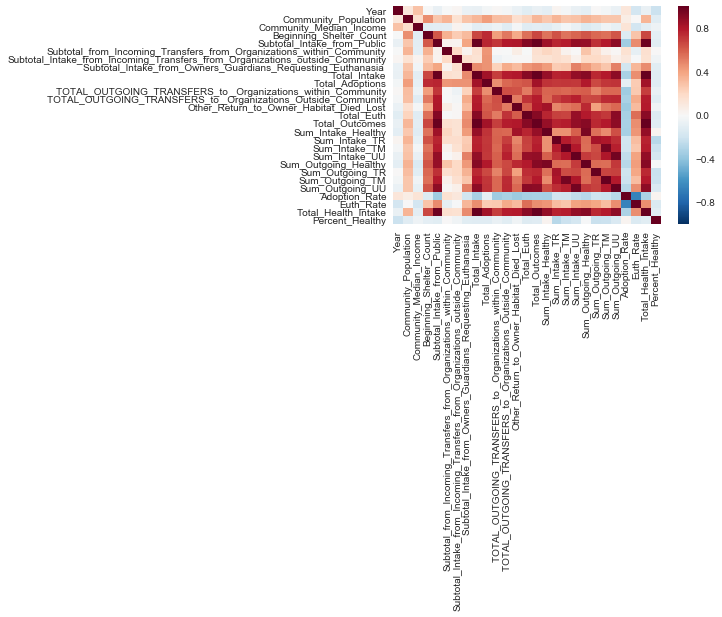

In [41]:
x = df_dog.corr()
sns.heatmap(x)

In [42]:
#create dummy variables for Community Region

dummy = pd.get_dummies(df_dog['Community_Region'], prefix='comm_reg')
print dummy.head()

   comm_reg_Midwest  comm_reg_Northeast  comm_reg_South  comm_reg_West
0                 0                   0               1              0
1                 0                   0               1              0
2                 0                   0               1              0
3                 0                   0               1              0
4                 0                   0               1              0


In [43]:
#create dummy variables for Shelter Type

dummy2 = pd.get_dummies(df_dog['Shelter_Type'], prefix='shelter')
print dummy2.head()

   shelter_AC  shelter_AG  shelter_TS
0           0           1           0
1           0           1           0
2           0           1           0
3           0           1           0
4           0           1           0


In [44]:
#new data frame

df_d = df_dog[['Community_Population', 'Community_Median_Income', 'Percent_Healthy',
              'Adoption_Rate', 'Euth_Rate']]

df_d = df_d.join(dummy.ix[:, 'comm_reg_Midwest':])

df_d = df_d.join(dummy2.ix[:, 'shelter_AC':])

df_d.head()

/Users/benitaho/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
/Users/benitaho/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix


,Community_Population,Community_Median_Income,Percent_Healthy,Adoption_Rate,Euth_Rate,comm_reg_Midwest,comm_reg_Northeast,comm_reg_South,comm_reg_West,shelter_AC,shelter_AG,shelter_TS
0,319510.0,55096.0,0.722846,0.988506,0.011494,0,0,1,0,0,1,0
1,327744.0,57617.0,0.840304,0.992366,0.007634,0,0,1,0,0,1,0
2,335988.0,53539.0,0.739316,0.970464,0.004219,0,0,1,0,0,1,0
3,340111.0,54444.0,0.863333,0.935374,0.017007,0,0,1,0,0,1,0
4,343080.0,56839.0,0.869732,0.992780,0.003610,0,0,1,0,0,1,0


In [45]:
df_d.describe()

,Community_Population,Community_Median_Income,Percent_Healthy,Adoption_Rate,Euth_Rate,comm_reg_Midwest,comm_reg_Northeast,comm_reg_South,comm_reg_West,shelter_AC,shelter_AG,shelter_TS
count,1.350000e+03,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000
mean,1.112929e+06,56356.405185,0.647918,0.631982,0.130184,0.126667,0.061481,0.298519,0.513333,0.379259,0.551852,0.068889
std,1.207722e+06,14045.482473,0.264500,0.341037,0.175796,0.332722,0.240300,0.457778,0.500007,0.485383,0.497488,0.253359
min,2.474100e+04,34119.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.897148e+05,45383.000000,0.483891,0.290144,0.006102,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,8.128260e+05,53539.000000,0.696277,0.743328,0.038513,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,1.529875e+06,67518.000000,0.859536,0.958727,0.211024,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,8.491079e+06,97532.000000,1.000000,1.000000,0.830189,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [46]:
df_d.corr()

,Community_Population,Community_Median_Income,Percent_Healthy,Adoption_Rate,Euth_Rate,comm_reg_Midwest,comm_reg_Northeast,comm_reg_South,comm_reg_West,shelter_AC,shelter_AG,shelter_TS
Community_Population,1.000000,0.174713,-0.124732,0.072401,0.004707,-0.095643,0.187169,-0.247373,0.200172,-0.082044,0.048144,0.062646
Community_Median_Income,0.174713,1.000000,-0.054493,0.136162,-0.184213,-0.217563,-0.123244,-0.438850,0.605790,-0.063039,0.107564,-0.090440
Percent_Healthy,-0.124732,-0.054493,1.000000,0.030642,-0.142678,0.110176,-0.036082,-0.121306,0.055087,-0.022149,0.039532,-0.035190
Adoption_Rate,0.072401,0.136162,0.030642,1.000000,-0.670599,0.008558,0.021292,-0.108576,0.083478,-0.819237,0.841710,-0.083272
Euth_Rate,0.004707,-0.184213,-0.142678,-0.670599,1.000000,0.024044,0.013885,0.212102,-0.216861,0.555399,-0.648556,0.209457
comm_reg_Midwest,-0.095643,-0.217563,0.110176,0.008558,0.024044,1.000000,-0.097475,-0.248438,-0.391134,-0.091129,0.074491,0.028316
comm_reg_Northeast,0.187169,-0.123244,-0.036082,0.021292,0.013885,-0.097475,1.000000,-0.166966,-0.262866,0.009670,-0.085595,0.149546
comm_reg_South,-0.247373,-0.438850,-0.121306,-0.108576,0.212102,-0.248438,-0.166966,1.000000,-0.669979,0.130640,-0.098940,-0.056003
comm_reg_West,0.200172,0.605790,0.055087,0.083478,-0.216861,-0.391134,-0.262866,-0.669979,1.000000,-0.063613,0.082151,-0.039440
shelter_AC,-0.082044,-0.063039,-0.022149,-0.819237,0.555399,-0.091129,0.009670,0.130640,-0.063613,1.000000,-0.867388,-0.212612


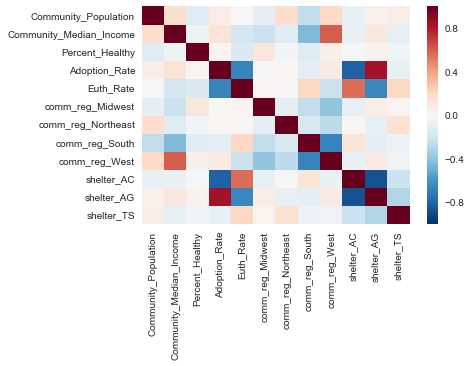

In [47]:
c = df_d.corr()
sns.heatmap(c)

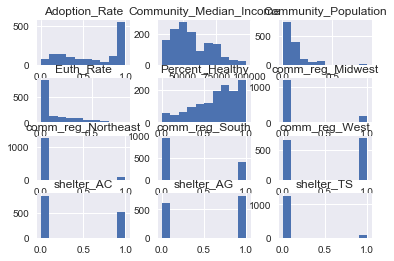

In [48]:
#plot the distribution of each variable
df_d.hist()
pl.show()

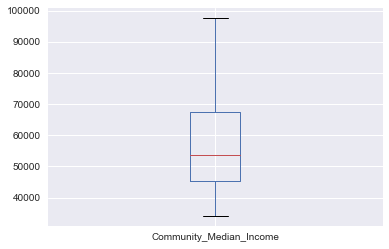

In [49]:
#create box plot for Community Median Income
df_d['Community_Median_Income'].plot(kind='box')

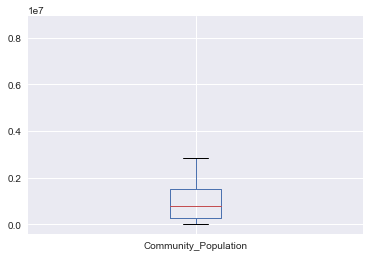

In [50]:
#create box plot for Community Population
df_d['Community_Population'].plot(kind='box')

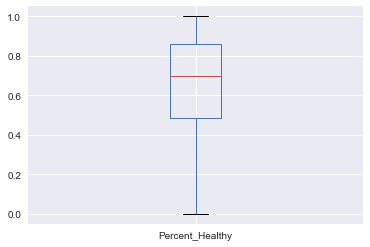

In [51]:
#create box plot for Percent Healthy
df_d['Percent_Healthy'].plot(kind='box')

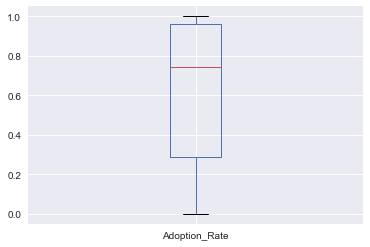

In [52]:
#create box plot for Adoption Rate
df_d['Adoption_Rate'].plot(kind='box')

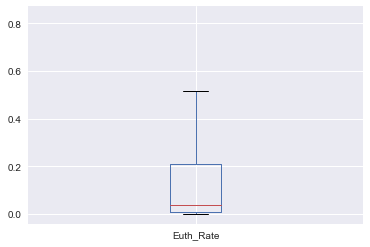

In [53]:
#create box plot for Euthanized Rate
df_d['Euth_Rate'].plot(kind='box')

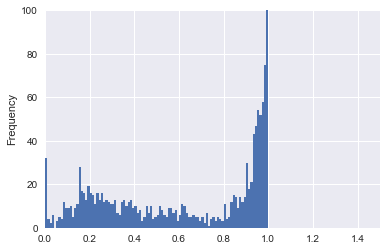

In [54]:
#different way of looking at Adoption Rate
df_d['Adoption_Rate'].plot(kind='hist', xlim=[0.0, 1.5], ylim=[0.0, 100], bins=100)

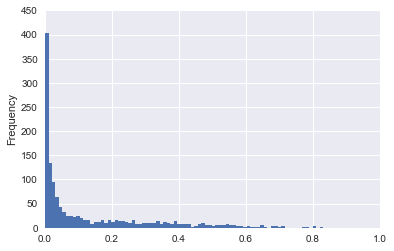

In [55]:
#different way of looking at Euthanized Rate
df_d['Euth_Rate'].plot(kind='hist', xlim=[0.0, 1.0], ylim=[0.0, 450], bins=80)

It does look as though there are some factors given that do correlate with Adoption Rate and Euthanized Rate.